# Visualise the Jet data from the dataset and processed signals

In [1]:
import numpy as np
import pandas as pd
import glob
import h5py
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

## A single event is shown with each event having 16 particles and 3 features for each particle

In [2]:
signals_loc = glob.glob("../signals_scaled7/*")
dataset_loc = glob.glob("../dataset_scaled7/dataset.h5")

features = ("η", "ϕ", "pT")

## Plot data


In [3]:
def plot_data(ax, title, feature_index, feature_column, input_featurenames):
    ax.hist(feature_column[:,feature_index].flatten(), 50, density=True, histtype='step', fill=False, linewidth=1.5)
    ax.set_yscale('log', nonpositive='clip')     
    ax.set_xlabel(input_featurenames[feature_index], fontsize=15)
    ax.set_ylabel('Prob. Density (a.u.)', fontsize=15)
    ax.set_title(title)
    ax.grid(True)

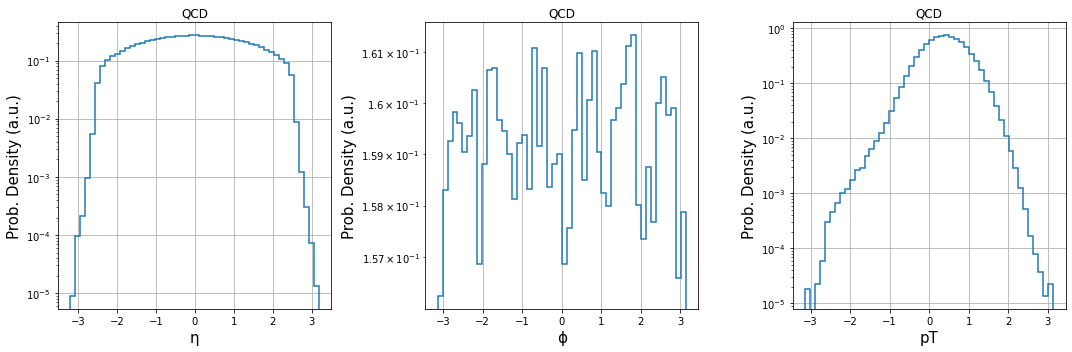

In [4]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
for f in dataset_loc:
    data = h5py.File(f, 'r')["x_test"][()]
    for i in range(len(features)):
        plot_data(axs[i], "QCD", i, data[:,:,i], features)

fig.tight_layout()
plt.show()

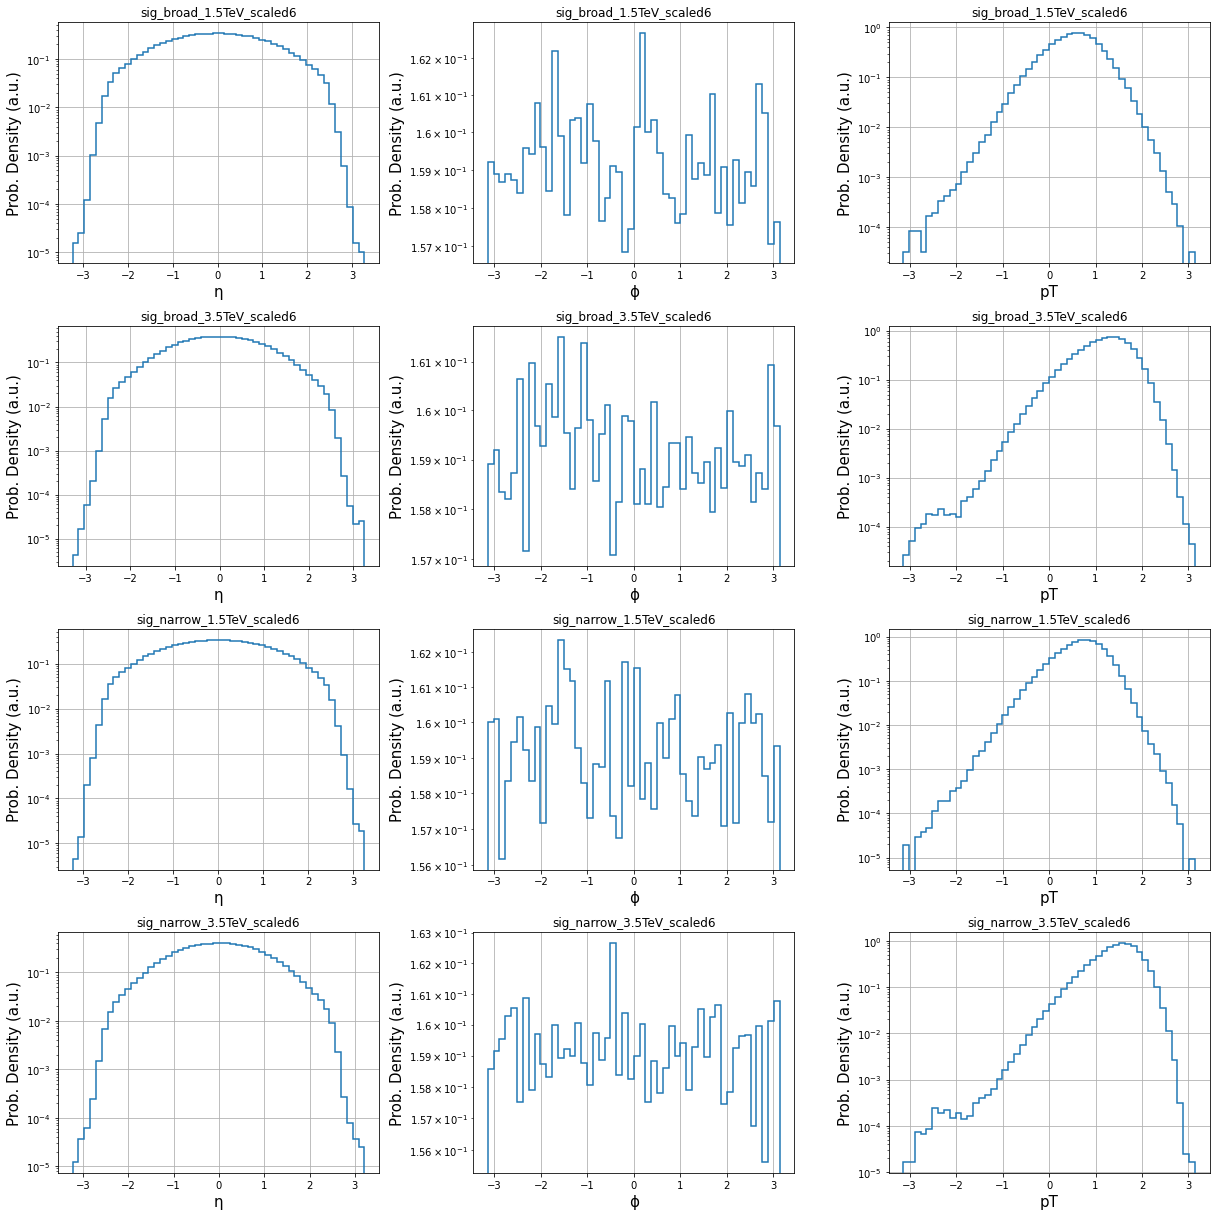

In [5]:
fig, axs = plt.subplots(len(signals_loc), len(features), figsize=(17,17))
for i, f in enumerate(signals_loc):
    data = h5py.File(f, 'r')["jetConstituentsList"][()]
    for j in range(len(features)):
        plot_data(axs[i][j], Path(f).stem, j, data[:,:,j], features)

fig.tight_layout()
plt.show()